You are given an array trees where trees[i] = [xi, yi] represents the location of a tree in the garden.

You are asked to fence the entire garden using the minimum length of rope as it is expensive. The garden is well fenced only if all the trees are enclosed.

Return the coordinates of trees that are exactly located on the fence perimeter.

 

Example 1:

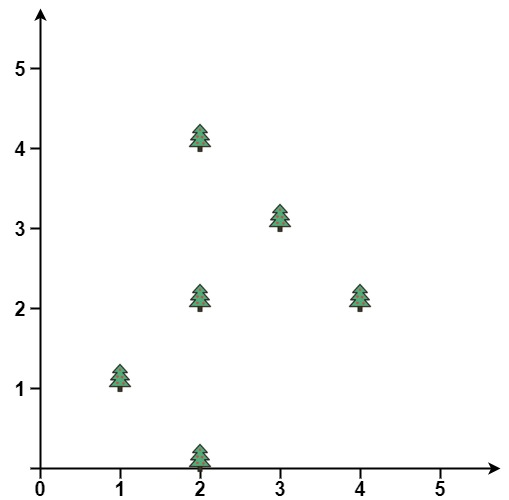

Input: points = [[1,1],[2,2],[2,0],[2,4],[3,3],[4,2]]
Output: [[1,1],[2,0],[3,3],[2,4],[4,2]]

Example 2:

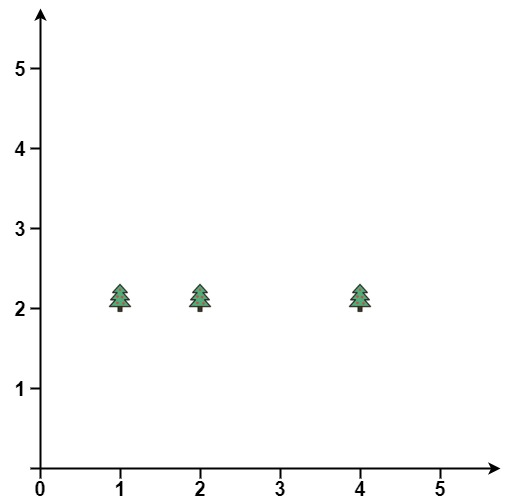

Input: points = [[1,2],[2,2],[4,2]]
Output: [[4,2],[2,2],[1,2]]

 

Constraints:

    1 <= points.length <= 3000
    points[i].length == 2
    0 <= xi, yi <= 100
    All the given points are unique.



In [120]:
# Jarvis Algorithm

from typing import List
from math import pi, atan, inf, sqrt


def get_angle(first, second):
    dx = second[0] - first[0]
    dy = second[1] - first[1]
    r = sqrt(dx**2 + dy**2)
    if r == 0:
        return 0, 0
    if dx == 0:
        if dy > 0:
            angle = pi / 2
        else:
            angle = -pi / 2
    else:
        angle = atan(dy / dx)
        if dx < 0:
            if angle < 0:
                angle = pi / 2 - angle
            else:
                angle = -pi / 2 + angle
    return angle, r


def angle_diff(start_angle, angle):
    if angle < start_angle:
        return 2 * pi - angle + start_angle
    return angle - start_angle
        
        
def find_tree(tree, trees, start_angle):
    best_tree = None
    best_angle_diff = None
    best_r = None
    for curr_tree in trees:
        angle, r = get_angle(tree, curr_tree)
        if r > 0:
            if best_tree is None:
                best_tree = curr_tree
                best_angle_diff = angle_diff(start_angle, angle)
                best_r = r
            else:
                if angle_diff(start_angle, angle) == best_angle_diff:
                    if r < best_r:
                        best_tree = curr_tree
                        best_r = r
                if angle_diff(start_angle, angle) < best_angle_diff:
                    best_tree = curr_tree
                    best_angle_diff = angle_diff(start_angle, angle)
                    best_r = r
                    
    return best_tree, get_angle(tree, best_tree)[0]


class Solution:
    def outerTrees(self, trees: List[List[int]]) -> List[List[int]]:
        if len(trees) <= 3:
            return trees
        trees = sorted(trees)
        fence = []
        tree = trees[0]
        fence.append(tree)
        next_, angle = find_tree(tree, trees, -pi / 2)
        while next_ not in fence:
            fence.append(next_)
            tree = next_
            next_, angle = find_tree(tree, trees, angle)
        start_idx = fence.index(next_)
        return fence[start_idx:]

In [128]:
# construct upper and lower fences
from itertools import chain

class Solution:
    def outerTrees(self, trees: List[List[int]]) -> List[List[int]]:
        
        trees = sorted(trees)
        U, L = [], []
        
        def cross(B, A, T):  # this function computes cross product between vectors BT=T-B and AB=B-A
            Bx, By, Ax, Ay, Tx, Ty = chain(B, A, T)
            return (Ty - By)*(Bx - Ax) - (By - Ay)*(Tx - Bx)
        
        for T in trees:
            while len(U) >= 2 and cross(U[-1], U[-2], T) < 0:
                U.pop()
            U.append(T)

            while len(L) >= 2 and cross(L[-1],L[-2],T) > 0:
                L.pop()
            L.append(T)

        return set(tuple(T) for T in (U+L))      

In [129]:
s = Solution()

In [130]:
s.outerTrees([[1,1],[2,2],[2,0],[2,4],[3,3],[4,2]]) # [[1,1],[2,0],[3,3],[2,4],[4,2]]

{(1, 1), (2, 0), (2, 4), (3, 3), (4, 2)}

In [131]:
s.outerTrees([[1,2],[2,2],[4,2]])

{(1, 2), (2, 2), (4, 2)}